# Results

In [12]:
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## 1. Baseline

Results of the baseline model:

In [2]:
with open('../results/baseline/noseed/results_1.json') as f:
    results = json.load(f)
df = pd.DataFrame({
    'precision': np.round(results['prec'] + [results['avg_prec']], 3),
    'recall': np.round(results['rec'] + [results['avg_rec']], 3),
    'f1': np.round(results['f1'] + [results['avg_f1']], 3)
}, index=(results['labels'] + ['average']))
print('accuracy:', np.round(results['acc'], 3))
df

accuracy: 0.782


,f1,precision,recall
negative,0.776,0.788,0.765
positive,0.787,0.776,0.799
average,0.782,0.782,0.782


## 2. Controlling randomness

In [4]:
acc = []
for path in os.listdir('../results/baseline/noseed'):
    with open(os.path.join('../results/baseline/noseed', path)) as f:
        results = json.load(f)
        acc.append(results['acc'])

seed_acc = []
for path in os.listdir('../results/baseline/seed'):
    with open(os.path.join('../results/baseline/seed', path)) as f:
        results = json.load(f)
        seed_acc.append(results['acc'])

df = pd.DataFrame({
    'min': np.round([np.amin(acc), np.amin(seed_acc)], 3),
    'max': np.round([np.amax(acc), np.amax(seed_acc)], 3),
    'mean': np.round([np.mean(acc), np.mean(seed_acc)], 3),
    'std': np.round([np.std(acc), np.std(seed_acc)], 3)
}, columns=['min', 'max', 'mean', 'std'], index=['no seed', 'seed'])
df.to_latex('../report/baseline.tex')

df

,min,max,mean,std
no seed,0.767,0.783,0.777,0.006
seed,0.776,0.799,0.789,0.007


## 3. Sensitivity Analisys

### 3.1 Window sizes

In [5]:
accs = []
names = []
for path in sorted(os.listdir('../results/baseline/windows'), key=lambda x: os.path.splitext(x)[0]):
    with open(os.path.join('../results/baseline/windows', path)) as f:
        results = json.load(f)
        accs.append(results['acc'])
        names.append(os.path.splitext(path)[0])
df = pd.DataFrame({'accuracy': accs}, index=names)
df.to_latex('../report/windows.tex')
df

,accuracy
1,0.787879
1-3-5-7,0.792727
14-15-16,0.753939
2-3-4,0.786667
2-3-4-5,0.773333
3,0.796364
3-4-5,0.790303
4-5-6,0.780606
5,0.773333
6-7-8-9,0.761212


### 3.2 Filters

,filter_size,accuracy
0,50,0.772121
1,100,0.786667
2,200,0.791515
3,300,0.790303
4,500,0.772121
5,1000,0.785455


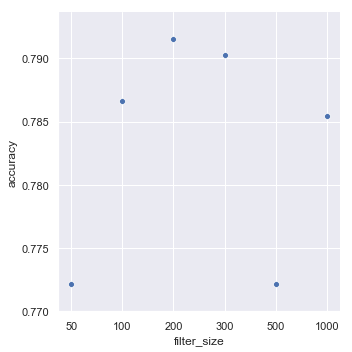

In [6]:
accs = []
names = []
for path in sorted(os.listdir('../results/baseline/filters'), key=lambda x: int(os.path.splitext(x)[0])):
    with open(os.path.join('../results/baseline/filters', path)) as f:
        results = json.load(f)
        accs.append(results['acc'])
        names.append(os.path.splitext(path)[0])

df = pd.DataFrame({'accuracy': accs, 'filter_size': names}, columns=['filter_size', 'accuracy'])
df.to_latex('../report/filters.tex')
sns.relplot(x='filter_size', y='accuracy', data=df)
df

### 3.3 POS-tagged

In [7]:
with open('../results/baseline/pos/1.zip.json') as f:
    results = json.load(f)
df = pd.DataFrame({
    'precision': np.round(results['prec'] + [results['avg_prec']], 3),
    'recall': np.round(results['rec'] + [results['avg_rec']], 3),
    'f1': np.round(results['f1'] + [results['avg_f1']], 3)
}, index=(results['labels'] + ['average']))
print('accuracy:', np.round(results['acc'], 3))
df.to_latex('../report/pos_tagged.tex')
df

accuracy: 0.676


,f1,precision,recall
negative,0.691,0.655,0.730
positive,0.661,0.703,0.624
average,0.676,0.679,0.677


In [15]:
raw = []
lemmatized = []

with open('../results/baseline/embedding/18.zip.json') as f:
        results = json.load(f)
        raw.append(results['acc'])
        
with open('../results/baseline/embedding/20.zip.json') as f:
        results = json.load(f)
        raw.append(results['acc'])

with open('../results/baseline/pos/17.zip.json') as f:
        results = json.load(f)
        lemmatized.append(results['acc'])

with open('../results/baseline/pos/19.zip.json') as f:
        results = json.load(f)
        lemmatized.append(results['acc'])

df = pd.DataFrame({
    'raw': np.round(raw, 3),
    'lemmatized': np.round(lemmatized, 3)
}, columns=['raw', 'lemmatized'], index=['wiki+Gigaword (w2v)', 'wiki+Gigaword (glove)'])
df.to_latex('../report/lemmatized.tex')
df

,raw,lemmatized
wiki+Gigaword (w2v),0.655,0.661
wiki+Gigaword (glove),0.753,0.765


### 3.1 Activation Function

In [14]:
accs = []
names = []
for path in os.listdir('../results/baseline/activation'):
    with open(os.path.join('../results/baseline/activation', path)) as f:
        results = json.load(f)
        accs.append(results['acc'])
        names.append(os.path.splitext(path)[0])

df = pd.DataFrame({'accuracy': accs}, index=names)
df

,accuracy
tanh,0.768485
sigmoid,0.665455
elu,0.780606
relu,0.793939
leakyrelu,0.789091


## 4. Influence of word embeddings

### 4.1 Word Embeddings

In [8]:
static = []
for path in sorted(os.listdir('../results/baseline/embedding')):
    with open(os.path.join('../results/baseline/embedding', path)) as f:
        results = json.load(f)
        static.append(results['acc'])

non_static = []
for path in sorted(os.listdir('../results/baseline/fine_tuning')):
    with open(os.path.join('../results/baseline/fine_tuning', path)) as f:
        results = json.load(f)
        non_static.append(results['acc'])

multichannel = []
for path in sorted(os.listdir('../results/baseline/multichannel')):
    with open(os.path.join('../results/baseline/multichannel', path)) as f:
        results = json.load(f)
        multichannel.append(results['acc'])

pd.DataFrame({
    'static': np.round(static,3),
    'non-static': np.round(non_static,3),
    'multichannel': np.round(multichannel,3)
}, columns=['static', 'non-static', 'multichannel'], index=[
    'wiki+Gigaword (w2v)',
    'wiki+Gigaword (glove)',
    'GoogleNews (w2v)',
    'CommonCrawl 840B (glove)',
    'wiki-news (fasttext)'
])

,static,non-static,multichannel
wiki+Gigaword (w2v),0.655,0.659,0.704
wiki+Gigaword (glove),0.753,0.764,0.759
GoogleNews (w2v),0.790,0.795,0.790
CommonCrawl 840B (glove),0.790,0.794,0.804
wiki-news (fasttext),0.796,0.801,0.818


### 4.2 Infering OOVs

In [9]:
with open('../results/baseline/infer-oov/fasttext-infer-oov.json') as f:
    results = json.load(f)
df = pd.DataFrame({
    'precision': np.round(results['prec'] + [results['avg_prec']], 3),
    'recall': np.round(results['rec'] + [results['avg_rec']], 3),
    'f1': np.round(results['f1'] + [results['avg_f1']], 3)
}, index=(results['labels'] + ['average']))
print('accuracy:', np.round(results['acc'], 3))
df

accuracy: 0.818


,f1,precision,recall
negative,0.812,0.831,0.794
positive,0.824,0.807,0.842
average,0.818,0.819,0.818
